# Using Python for Research Homework: Week 2

In this homework, we will use the tools we've covered in the past two weeks to create a tic-tac-toe (noughts and crosses) simulator and evaluate basic winning strategies.

### Exercise 1

Tic-tac-toe (or noughts and crosses) is a simple strategy game in which two players take turns placing a mark on a 3x3 board, attempting to make a row, column, or diagonal of three with their mark. In this homework, we will use the tools we've covered in the past two weeks to create a tic-tac-toe simulator and evaluate basic winning strategies.

In the following exercises, we will learn to create a tic-tac-toe board, place markers on the board, evaluate if either player has won, and use this to simulate two basic strategies.

#### Instructions 

- For our tic-tac-toe board, we will use a numpy array with dimension 3 by 3. 
- Make a function `create_board()` that creates such a board with the value of each cell set to the integer `0`.
- Call `create_board()` and store it.

In [13]:
import numpy as np

def create_board():
    return np.zeros((3,3), dtype=int)

x = create_board()
print(x)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


### Exercise 2

Players 1 and 2 will take turns changing values of this array from a 0 to a 1 or 2, indicating the number of the player who places a marker there.

#### Instructions 

- Create a function `place(board, player, position)`, where:
    - `player` is the current player (an integer 1 or 2).
    - `position` is a tuple of length 2 specifying a desired location to place their marker.
    - Your function should only allow the current player to place a marker on the board (change the board position to their number) if that position is empty (zero).
- Use `create_board()` to store a board as `board`, and use `place` to have Player 1 place a marker on location `(0, 0)`.

In [230]:
def place(board, player, position):
    a,b = position
    if board[a,b] == 0:
        board[a,b] = player
        
board = create_board()
place(board, 1, (0,0))
print(board)

[[1 0 0]
 [0 0 0]
 [0 0 0]]


### Exercise 3

In this exercise, we will determine which positions are available to either player for placing their marker.

#### Instructions 
- Create a function `possibilities(board)` that returns a list of all positions (tuples) on the board that are not occupied (0). (Hint: `numpy.where` is a handy function that returns a list of indices that meet a condition.)
- `board` is already defined from previous exercises. Call `possibilities(board)` to see what it returns!

In [231]:
def possibilities(board):
    p = np.where(board == 0)
    return [(p[0][i],p[1][i]) for i in range(len(p[0]))]

    
print(possibilities(board))
print(board)

[(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
[[1 0 0]
 [0 0 0]
 [0 0 0]]


### Exercise 4

The next step is for the current player to place a marker among the available positions. In this exercise, we will select an available board position at random and place a marker there.

#### Instructions 

- Write a function `random_place(board, player)` that places a marker for the current player at random among all the available positions (those currently set to 0).
    - Find possible placements with `possibilities(board)`.
    - Select one possible placement at random using `random.choice(selection)`.
- `board` is already defined from previous exercises. Call `random_place(board, player)` to place a random marker for Player 2, and store this as board to update its value.

In [232]:
import random 
random.seed(1)

def random_place(board, player):
    s = random.choice(possibilities(board))
    place(board, player, s)
    
random_place(board, 2)
print(board)

[[1 0 0]
 [2 0 0]
 [0 0 0]]


### Exercise 5

We will now have both players place three markers each.

#### Instructions 

- A new `board` is already given. Call `random_place(board, player)` to place three pieces each on board for players 1 and 2.
- Print board to see your result.

In [233]:
random.seed(1)
board = create_board()

for i in range(2,8):
    if i%2 == 0:
        random_place(board, 1)
    else: 
        random_place(board, 2)

print(board)

[[2 2 1]
 [0 1 0]
 [0 1 2]]


### Exercise 6

In the next few exercises, we will make functions that check whether either player has won the game.

#### Instructions 
- Make a function `row_win(board, player)` that takes the player (integer) and determines if any row consists of only their marker. 
    - Have it return `True` if this condition is met and `False` otherwise.
- `board` is already defined from previous exercises. Call `row_win` to check if Player 1 has a complete row.

In [234]:
def row_win(board, player):
    if np.any(np.all(board == player,axis=1)) == True:
        return True
    else:
        return False
    
row_win(board, 1)

False

### Exercise 7

In the next few exercises, we will make functions that verify if either player has won the game.

#### Instructions 
- Make a function `col_win(board, player)` that takes the player (integer) and determines if any column consists of only their marker. 
    - Have it return `True` if this condition is met and `False` otherwise.
- `board` is already defined from previous exercises. Call `col_win` to check if Player 1 has a complete row.

In [235]:
def col_win(board, player):
    if np.any(np.all(board == player, axis=0)) == True:
        return True
    else: 
        return False
    
col_win(board, 1)

False

### Exercise 8

In the next few exercises, we will make functions that verify if either player has won the game.

#### Instructions 
- Finally, create a function `diag_win(board, player)` that tests if either diagonal of the board consists of only their marker. Have it return `True` if this condition is met, and `False` otherwise.
- `board` has been slightly modified from a previous exercise. Call `diag_win` to check if Player 2 has a complete diagonal.

In [200]:
board[1,1] = 2

def diag_win(board, player):
    if np.all(np.diagonal(np.fliplr(board)) == player) == True or np.all(np.diagonal(board == player)) == True:
        return True
    else:
        return False
    
diag_win(board, 2)

True

### Exercise 9

In the next few exercises, we will make functions that check whether either player has won the game.

#### Instructions 
- Create a function `evaluate(board)` that uses `row_win`, `col_win`, and `diag_win` functions for both players. If one of them has won, return that player's number. If the board is full but no one has won, return -1. Otherwise, return 0.
- `board` is already defined from previous exercises. Call evaluate to see if either player has won the game yet.

In [213]:
def evaluate(board):
    winner = 0
    for player in [1, 2]:
        row = row_win(board, player)
        col = col_win(board, player)
        diag = diag_win(board, player)
        if row == True or col == True or diag == True:
            winner = player
    if np.all(board != 0) and winner == 0:
        winner = -1
    return winner

evaluate(board)

2

### Exercise 10

In this exercise, we will use all the functions we have made to simulate an entire game.

#### Instructions 

- `create_board()`, `random_place(board, player)`, and `evaluate(board)` have been created in previous exercises. Create a function `play_game()` that:
    - Creates a board.
    - Alternates taking turns between two players (beginning with Player 1), placing a marker during each turn.
    - Evaluates the board for a winner after each placement.
    - Continues the game until one player wins (returning 1 or 2 to reflect the winning player), or the game is a draw (returning -1).
- Call play_game 1000 times, and store the results of the game in a list called `results`.

(array([123.,   0.,   0.,   0.,   0.,   0., 591.,   0.,   0., 286.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 10 Patch objects>)

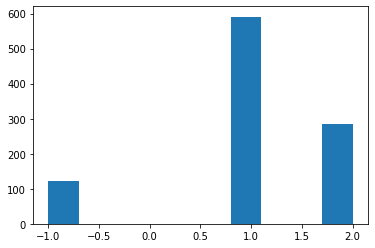

In [252]:
import matplotlib.pyplot as plt

random.seed(1)

def play_game():
    b = create_board()
    winner = -1
    
    for i in range(2,11):
        if i%2 == 0:
            random_place(b, 1)
        else: 
            random_place(b, 2)
        if evaluate(b) != 0:
            winner = evaluate(b)
            break
    return winner

results = [play_game() for i in range(1000)]

plt.hist(results)

#### Exercise 11

In the previous exercise, we see that when guessing at random, it's better to go first, as expected. Let's see if Player 1 can improve their strategy. 

#### Instructions 
- Create a function `play_strategic_game()`, where Player 1 always starts with the middle square, and otherwise both players place their markers randomly.
- Call `play_strategic_game` 1000 times.

(array([ 90.,   0.,   0.,   0.,   0.,   0., 716.,   0.,   0., 194.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 10 Patch objects>)

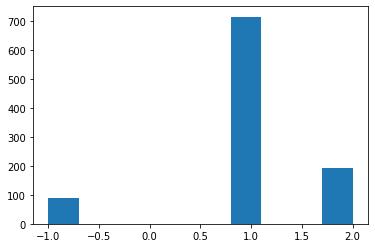

In [222]:
random.seed(1)

def play_strategic_game():
    b = create_board()
    place(b, 1, (1,1))
    winner = -1
    
    for i in range(3,12):
        if i%2 == 0:
            random_place(b, 1)
        else: 
            random_place(b, 2)
        if evaluate(b) != 0:
            winner = evaluate(b)
            break
    return winner

results = [play_strategic_game() for i in range(1000)]

plt.hist(results)